### Network-Data

Data Preparation

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import time

In [2]:
% matplotlib inline
import json

### Get all data

In [3]:
import glob
ann_files =  glob.glob("../data/*.ann")
len(ann_files)

200

#### Get T and E and R data : 

In [4]:
"""============================================================
This class helps to read data from 'sample.ann' files to create
nodes and edges for network and graph analysis

By: Sigdel D.       Data-2018-Jan-10
==============================================================="""



class DataReader(object):
    
    """Llist: list of lines of files
       t_dict :  dictionary of T-terms
       e_dict : dictionary of e-terms
       r_dict : dictionary of r-terms
       Nodes: List of nodes
       Edges : List of edges"""
    
    
    def __init__(self,input_file):
        #Input file shoulsd be provided
        self.input_file = input_file
        self.Llist = []
        self.t_dict = {}  
        self.e_dict = {}
        self.r_dict = {}
        self.node_dict ={}
        self.Nodes  =[]
        self.Edges = []
        
        
        self.group = ['Coreference', 'Severity', 'Occupation', 'Other_event',\
                      'Frequency', 'Gender', 'Biological_structure', 'Volume',\
                      'Biological_attribute', 'Age', 'Sign_symptom', 'Date',\
                      'History', 'Time', 'Shape', 'Lab_value', 'Nonbiological_location',\
                      'Administration', 'Distance', 'Other_entity', 'Height',\
                      'Activity', 'Family_history', 'Dosage', 'Ethnicity',\
                      'Subject', 'Detailed_description', 'Qualitative_concept',\
                      'Texture', 'Area', 'Weight', 'Quantitative_concept', \
                      'Therapeutic_procedure', 'Disease_disorder', 'Duration',\
                      'Color', 'Medication', 'Diagnostic_procedure']
        
        
        self.relations = ['BEFORE','MODIFY','SUB_PROCEDURE','IDENTICAL','AFTER'\
                        'OVERLAP', 'CAUSE','CO-OCCURANCE','DECREASE_TO',\
                        'DECREASE_FROM', 'INCREASE_FROM','INCREASE_TO']
        
        
        
        
    # function to sum charcters in the list    
    def sum_chr_items(self, items):
        st =""
        for item in items:
            st = st+" "+item
        return st
    
    
    
    # Line of text is converted to list
    def line_to_list(self):
        with open(self.input_file) as f:
            for line in f:
                self.Llist.append(line.split())
                
                
                
                
    def find_group(self,g):
        for k,item in enumerate(self.group):
            if item == g:
                return(k+1)
            
            
                
    def find_edg_value(self,eg):
        for k,item in enumerate(self.relations):
            if item == eg:
                return(10*(k+1))
            
            
    def set_tdata(self):
        for item in self.Llist:
            if item[0][0] =="T":
                t_key = item[0]
                t_type = item[1]
                t_val = self.sum_chr_items(item[4:])
                
                self.t_dict.update({t_key:[t_type,t_val]})
                
                self.node_dict.update({t_key:[t_type,t_val]})
                
                self.Nodes.append({"id":t_key,\
                              "type":t_type,\
                              "group":self.find_group(t_type),\
                              "name":t_val})
               
                    
                
                
                
    def set_edata(self):
        for item in self.Llist:            
            if item[0][0] =="E":
                t_key = item[1].split(':')[1]
                e_key = item[0]
                e_type = item[1].split(':')[0]
                e_val = self.t_dict[t_key][1]
                
                
                self.e_dict.update({e_key:[e_type,e_val]})
                
                self.node_dict.update({e_key:[e_type,e_val]})  
                
                self.Nodes.append({"id":e_key,\
                            "type":e_type,\
                            "group":self.find_group(e_type),\
                            "name":e_val})
                
                
                
    def set_rdata(self):
        self.line_to_list()
        self.set_tdata()
        self.set_edata()
        for item in self.Llist:           
            if item[0][0] =="R":
                r_key = item[0]
                rln = item[1]
                fm_id = item[2].split(":")[1]
                to_id = item[3].split(":")[1]
                fm_type = self.node_dict[fm_id][0]
                to_type = self.node_dict[to_id][0]
                fm_name = self.node_dict[fm_id][1]
                to_name = self.node_dict[to_id][1]
                
                self.r_dict.update({r_key:[rln,fm_id,to_id]}) 

                self.Edges.append({"id":r_key,\
                            "name":rln,\
                            "value":self.find_edg_value(rln),\
                            "source":fm_id,\
                            "source_name":fm_name,\
                            "source_group":self.find_group(fm_type),\
                            "target":to_id,\
                            "target_name":to_name,\
                            "target_group":self.find_group(to_type)})
                
    
                
    def data_dumper(self,file_name,data):
            with open(file_name, 'w') as fp:
                json.dump(data, fp)
                
    
     
    def get_nodes(self,dump=False):
        self.line_to_list()
        self.set_tdata()
        self.set_edata()
        if dump:
            self.data_dumper(file_name = 'nodes.json',data = self.Nodes)
        return self.Nodes
    
    
    
    def get_edges(self, dump=False):
        self.line_to_list()
        self.set_rdata()
        if dump:
            self.data_dumper(file_name = 'edges.json',data = self.Edges)
        return self.Edges
    
    
    def get_data(self,dump=False):
        all_data = {}
        nodes = self.get_nodes()
        edges = self.get_edges()
        all_data.update({'nodes':nodes,'links':edges })
        
        if dump:
            self.data_dumper(file_name = 'data.json',data = all_data) 
        
        return all_data

In [21]:
DR = DataReader(ann_files[2])

In [22]:
DR.get_data(dump=True)

{'links': [{'id': 'R1',
   'name': 'MODIFY',
   'source': 'T10',
   'source_group': 7,
   'source_name': ' abdominal',
   'target': 'E5',
   'target_group': 11,
   'target_name': ' pain',
   'value': 20},
  {'id': 'R2',
   'name': 'MODIFY',
   'source': 'T12',
   'source_group': 7,
   'source_name': ' stomal',
   'target': 'E7',
   'target_group': 11,
   'target_name': ' diarrhoea',
   'value': 20},
  {'id': 'R3',
   'name': 'MODIFY',
   'source': 'E2',
   'source_group': 35,
   'source_name': ' 4 year',
   'target': 'E1',
   'target_group': 34,
   'target_name': " Crohn's disease",
   'value': 20},
  {'id': 'R4',
   'name': 'MODIFY',
   'source': 'E8',
   'source_group': 35,
   'source_name': ' two day',
   'target': 'E3',
   'target_group': 11,
   'target_name': ' malaise',
   'value': 20},
  {'id': 'R5',
   'name': 'MODIFY',
   'source': 'E8',
   'source_group': 35,
   'source_name': ' two day',
   'target': 'E4',
   'target_group': 11,
   'target_name': ' fever',
   'value': 20},
 

-------

### Netwok-X

In [10]:
import networkx as nx

In [11]:
DR = DataReader(ann_files[1])

In [12]:
ND = DR.get_nodes()
EDG = DR.get_edges()

In [13]:
ND

[{'group': 10, 'id': 'T1', 'name': ' 34-yr-old', 'type': 'Age'},
 {'group': 6, 'id': 'T2', 'name': ' man', 'type': 'Gender'},
 {'group': 22, 'id': 'T3', 'name': ' presented', 'type': 'Activity'},
 {'group': 11, 'id': 'T4', 'name': ' fever', 'type': 'Sign_symptom'},
 {'group': 11, 'id': 'T5', 'name': ' cough', 'type': 'Sign_symptom'},
 {'group': 27, 'id': 'T6', 'name': ' chronic', 'type': 'Detailed_description'},
 {'group': 13, 'id': 'T7', 'name': ' smoker', 'type': 'History'},
 {'group': 13,
  'id': 'T8',
  'name': ' history of pulmonary tuberculosis',
  'type': 'History'},
 {'group': 34,
  'id': 'T9',
  'name': ' tuberculosis',
  'type': 'Disease_disorder'},
 {'group': 7,
  'id': 'T10',
  'name': ' pulmonary',
  'type': 'Biological_structure'},
 {'group': 38,
  'id': 'T13',
  'name': ' computed tomographic',
  'type': 'Diagnostic_procedure'},
 {'group': 38, 'id': 'T14', 'name': ' (CT)', 'type': 'Diagnostic_procedure'},
 {'group': 11, 'id': 'T15', 'name': ' nodules', 'type': 'Sign_symp

In [14]:
EDG

[{'id': 'R1',
  'name': 'MODIFY',
  'source': 'T6',
  'source_group': 27,
  'source_name': ' chronic',
  'target': 'E3',
  'target_group': 11,
  'target_name': ' cough',
  'value': 20},
 {'id': 'R2',
  'name': 'MODIFY',
  'source': 'T10',
  'source_group': 7,
  'source_name': ' pulmonary',
  'target': 'E4',
  'target_group': 34,
  'target_name': ' tuberculosis',
  'value': 20},
 {'id': 'R5',
  'name': 'MODIFY',
  'source': 'T16',
  'source_group': 27,
  'source_name': ' tiny',
  'target': 'E9',
  'target_group': 11,
  'target_name': ' nodules',
  'value': 20},
 {'id': 'R6',
  'name': 'MODIFY',
  'source': 'T17',
  'source_group': 27,
  'source_name': ' multiple',
  'target': 'E9',
  'target_group': 11,
  'target_name': ' nodules',
  'value': 20},
 {'id': 'R7',
  'name': 'MODIFY',
  'source': 'T18',
  'source_group': 7,
  'source_name': ' both lungs',
  'target': 'E9',
  'target_group': 11,
  'target_name': ' nodules',
  'value': 20},
 {'id': 'R8',
  'name': 'MODIFY',
  'source': 'T20',

In [15]:
G=nx.Graph()

In [16]:
for item in ND:
    nd = item["id"]
    G.add_node(nd)

In [17]:
G.nodes()

NodeView(('E50', 'T33', 'T41', 'T60', 'T32', 'T62', 'T89', 'T104', 'T29', 'E33', 'T110', 'T39', 'E13', 'T94', 'T1', 'E44', 'T99', 'E48', 'T76', 'E39', 'T81', 'T22', 'T50', 'T35', 'T82', 'T114', 'T107', 'E55', 'E8', 'E32', 'E1', 'T4', 'T56', 'T84', 'E38', 'E15', 'T113', 'T37', 'E42', 'T70', 'T91', 'T6', 'T42', 'T10', 'T109', 'T77', 'E36', 'T79', 'T17', 'E37', 'T55', 'T92', 'T46', 'T30', 'T44', 'E3', 'T100', 'T25', 'E52', 'T105', 'T27', 'E14', 'T72', 'E53', 'E16', 'E23', 'T111', 'T80', 'T47', 'E51', 'T58', 'E43', 'T65', 'T31', 'T66', 'E9', 'E34', 'T36', 'T63', 'T87', 'T51', 'T15', 'E18', 'T21', 'E45', 'E10', 'T90', 'T48', 'T5', 'T112', 'T93', 'T106', 'E49', 'T3', 'T78', 'T96', 'T64', 'T75', 'T8', 'E2', 'T19', 'T38', 'E4', 'T13', 'E40', 'T57', 'T9', 'T71', 'E27', 'E29', 'T61', 'E54', 'T83', 'T88', 'E20', 'E19', 'T20', 'T49', 'T45', 'E28', 'E7', 'E47', 'T102', 'T23', 'T14', 'E30', 'E46', 'T40', 'T24', 'T54', 'T74', 'T43', 'T97', 'T2', 'E41', 'E35', 'E22', 'T34', 'T86', 'T16', 'E11', 'T103'

In [18]:
for item in EDG:
    edg = (item["source"],item["target"])
    print(edg)
    G.add_edge(*edg)

('T6', 'E3')
('T10', 'E4')
('T16', 'E9')
('T17', 'E9')
('T18', 'E9')
('T20', 'E10')
('T21', 'E10')
('T22', 'E10')
('E13', 'E12')
('T27', 'T26')
('T28', 'T26')
('T36', 'T35')
('T37', 'T38')
('T38', 'T29')
('E15', 'T35')
('E16', 'T35')
('E16', 'T35')
('E17', 'T35')
('E18', 'T35')
('E14', 'E15')
('E14', 'E16')
('E14', 'E17')
('E14', 'E18')
('T42', 'T39')
('T42', 'T40')
('E19', 'T42')
('T49', 'E26')
('T51', 'E26')
('T52', 'E27')
('T54', 'E27')
('T53', 'E27')
('T57', 'E28')
('E33', 'E31')
('T66', 'E32')
('T65', 'E32')
('T63', 'E31')
('T62', 'E31')
('T61', 'E31')
('T60', 'E31')
('T71', 'E35')
('T72', 'E35')
('T74', 'E36')
('T75', 'T74')
('T81', 'T80')
('T78', 'T79')
('T83', 'T82')
('T77', 'E38')
('T79', 'T77')
('T80', 'T77')
('T82', 'T77')
('T86', 'T85')
('T84', 'T85')
('T87', 'T85')
('T90', 'E37')
('T89', 'E37')
('E40', 'E39')
('E41', 'E39')
('E42', 'E39')
('T99', 'T98')
('E43', 'E39')
('E44', 'E39')
('E45', 'E39')
('E46', 'E39')
('E47', 'E39')
('E48', 'E39')
('T92', 'T93')
('E40', 'T93')
(

In [19]:
options = {
    'node_color': 'green',
    'edge_color': 'blue',
     'node_size': 400,
     'width': 1 }

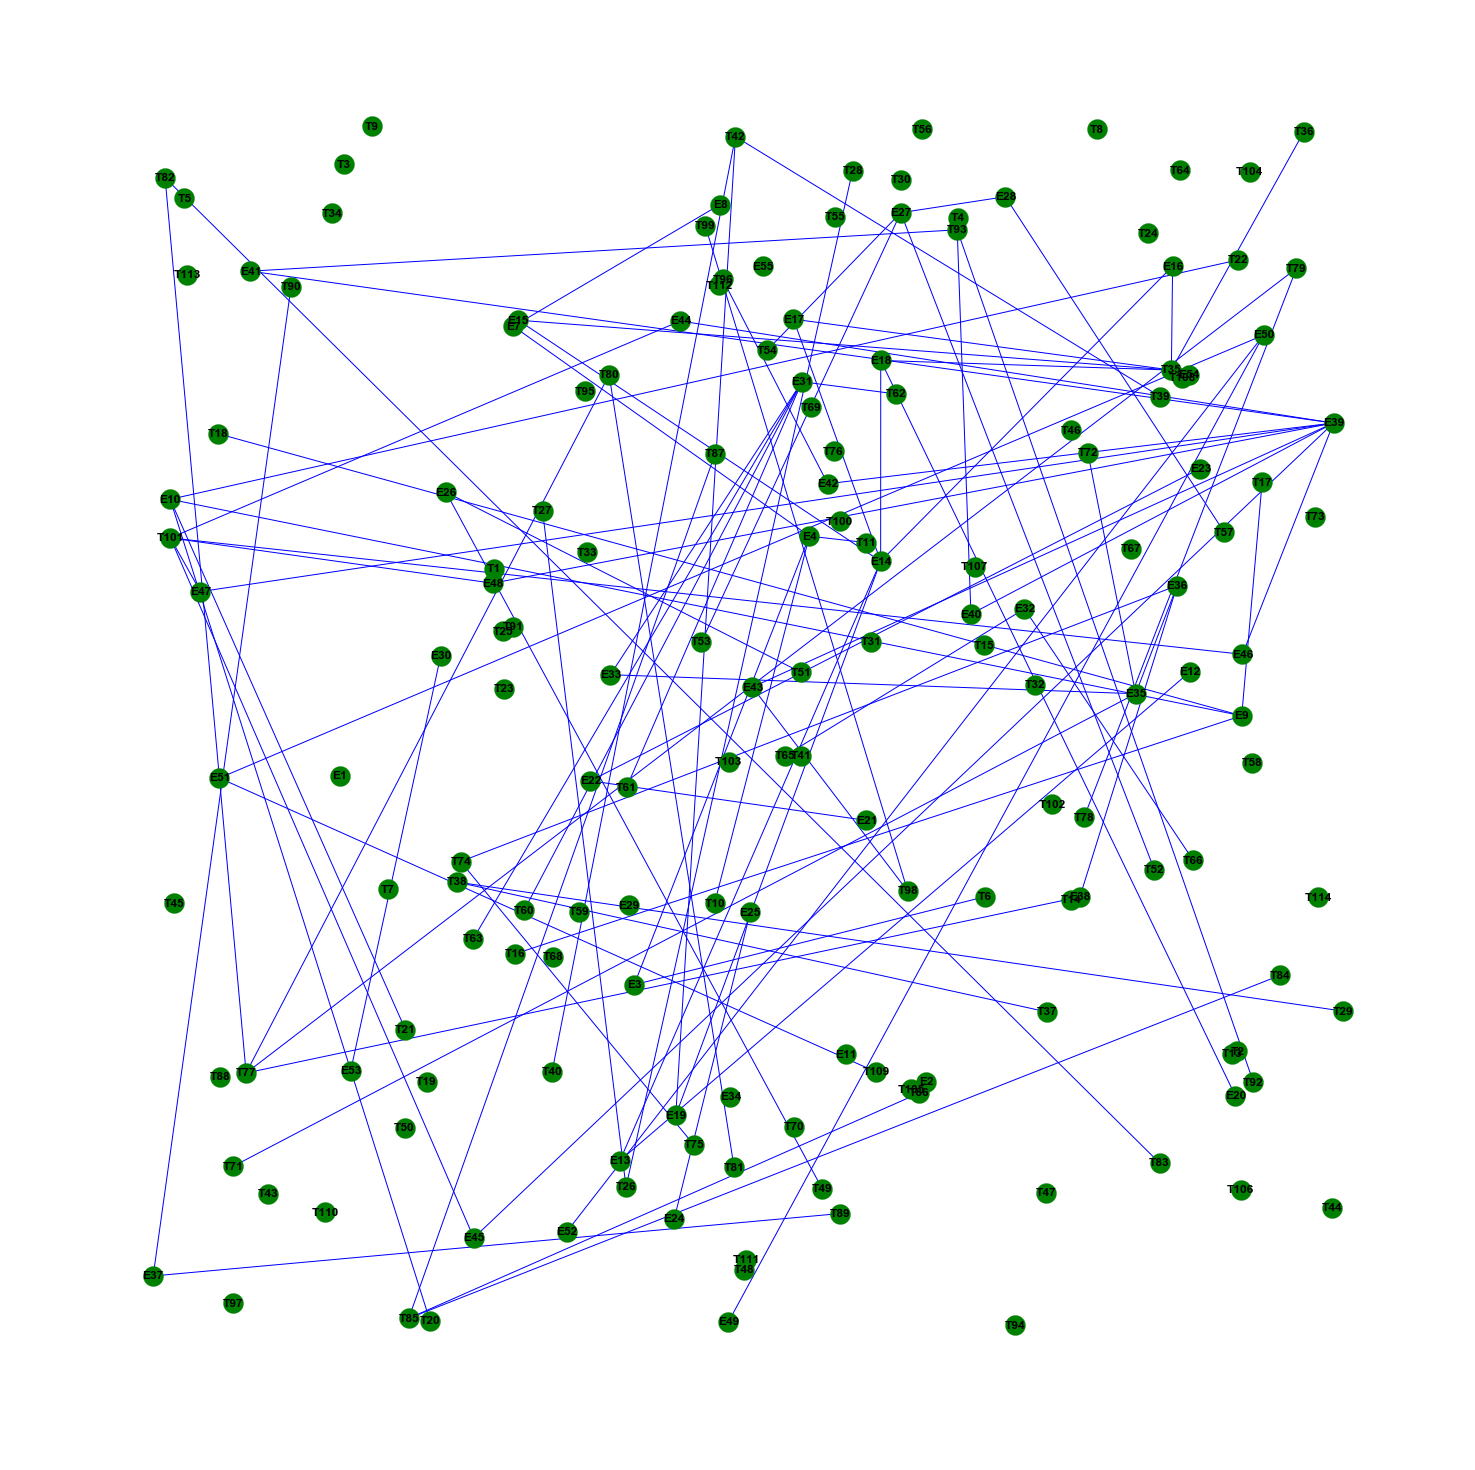

In [20]:
plt.figure(figsize =[20,20])
nx.draw_random(G, **options,with_labels=True, font_weight='bold')

In [48]:
list(G.neighbors("T4"))

[]

In [49]:
centrality = nx.eigenvector_centrality(G)

In [50]:
centrality

{'E1': 1.8907166494620555e-51,
 'E10': 7.567763141106076e-12,
 'E11': 1.8907166494620555e-51,
 'E12': 3.0067486572030082e-05,
 'E13': 9.461032795887768e-05,
 'E14': 0.0002676332918100617,
 'E15': 0.00015809583429336158,
 'E16': 0.00015809583429336158,
 'E17': 0.00015809583429336158,
 'E18': 0.0001758572433563375,
 'E19': 9.737961671759689e-05,
 'E2': 1.8907166494620555e-51,
 'E20': 5.5888034819084794e-05,
 'E21': 1.989799081658029e-22,
 'E22': 2.8140008476783147e-22,
 'E23': 1.989799081658029e-22,
 'E24': 1.4285851094437131e-28,
 'E25': 1.4285851094437131e-28,
 'E26': 2.8140008476783147e-22,
 'E27': 3.4269178126398866e-14,
 'E28': 2.1522809759602047e-14,
 'E29': 1.8907166494620555e-51,
 'E3': 9.551530250075251e-14,
 'E30': 1.4285851094437131e-28,
 'E31': 2.1290315415809224e-10,
 'E32': 2.8140008476783147e-22,
 'E33': 1.7254640863280742e-10,
 'E34': 1.8907166494620555e-51,
 'E35': 2.0908092425737e-10,
 'E36': 1.6772897414707224e-10,
 'E37': 2.8140008476783147e-22,
 'E38': 1.186480703301

-----------

### References:
1. https://bl.ocks.org/mbostock/950642